<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula06b_MLP_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

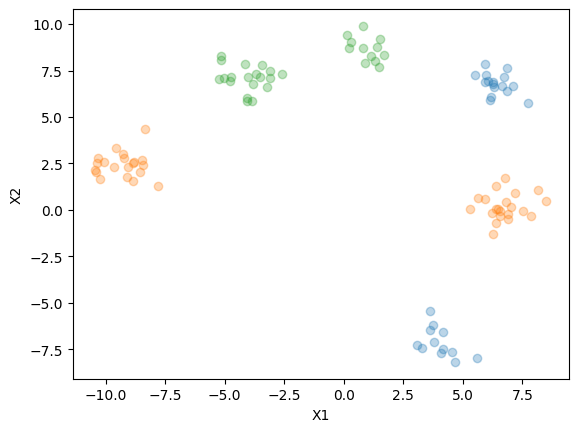

In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def criaDatasetBidimensionalNãoLinearmenteSeparável(n=20, n_classes=3):
    """
    Cria um dataset bidimensional Binário não linearmente separável.
    """
    X, y = make_blobs(n_samples=n, centers=n_classes*2, cluster_std=0.8)
    y = np.array(y%n_classes, dtype=int)
    return X, y

X, y = criaDatasetBidimensionalNãoLinearmenteSeparável(1000)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.9)


def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

def define_axes(X):
    offset = 0.2
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [12]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0
1.0


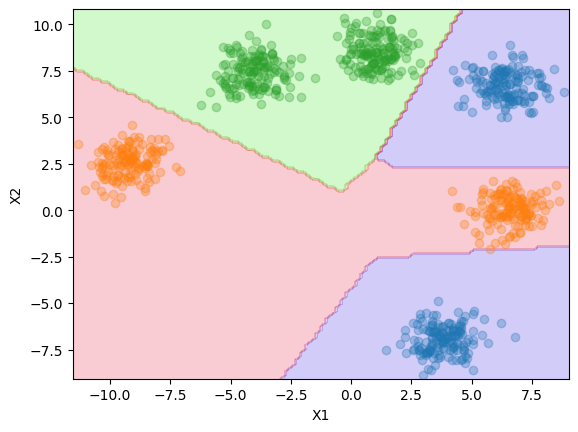

In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5))
mlp.fit(Xtr, ytr)
print(accuracy(ytr, mlp.predict(Xtr)))
plotaDatasetBidimensional(Xte, yte)
plot_predictions(mlp, Xte)
print(accuracy(yte, mlp.predict(Xte)))

4/4 [==============================] - 0s 3ms/step
1.0
29/29 [==============================] - 0s 2ms/step
1.0


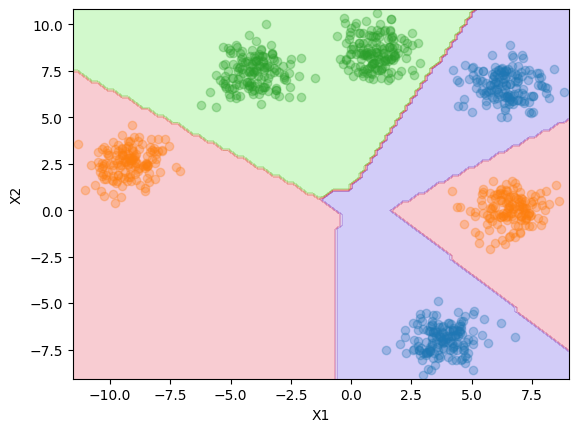

In [14]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
import numpy as np

class MLP(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, hidden_layer_sizes=[5]):
    self.max_iter = max_iter
    self.hidden_layer_sizes = hidden_layer_sizes

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)

    self.model = keras.models.Sequential()
    self.model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))

    for h in self.hidden_layer_sizes:
      self.model.add(keras.layers.Dense(h, activation='relu'))

    self.model.add(keras.layers.Dense(yhot.shape[1]))
    self.model.add(keras.layers.Activation('softmax'))

    self.model.compile(loss='categorical_crossentropy')
    self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)
    return self

  def predict_proba(self, X, y=None):
    return self.model.predict(X)

  def predict(self, X):
    predictions = self.model.predict(X)
    ypred = self.labels[np.argmax(predictions, axis=1)]
    return ypred

mlp = MLP(hidden_layer_sizes=[5,4])
mlp.fit(Xtr, ytr)
print(accuracy(ytr, mlp.predict(Xtr)))
plotaDatasetBidimensional(Xte, yte)
plot_predictions(mlp, Xte)
print(accuracy(yte, mlp.predict(Xte)))

In [15]:
print(mlp.model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________
None
